<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 1, 2016: back to the future
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of first (October 11, 2016) class in Python, about SymPy basics.
</div>

In [194]:
from sympy import *
from sympy.abc import x, n, y, h, a, b, c, i, j, k

init_printing()

# basic manipulations

In [2]:
frac = 2/4
frac, type(frac)

(0.5, float)

In [3]:
frac = 2//4
frac, type(frac)

(0, int)

In [11]:
frac = Integer(2)/4
type(frac)

sympy.core.numbers.Half

In [12]:
frac

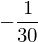

In [308]:
S(1)/3 + S(4)/5 - Integer(7)/6

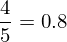

In [313]:
Eq(S(4)/5, S(4/5), evaluate=False)

In [17]:
factorial(10)

In [40]:
factorial(500)

# `evalf`

More here: http://docs.sympy.org/latest/modules/evalf.html

In [47]:
factorial(500).evalf()

In [50]:
help(factorial(500).evalf)

Help on method evalf in module sympy.core.evalf:

evalf(n=15, subs=None, maxn=100, chop=False, strict=False, quad=None, verbose=False) method of sympy.core.numbers.Integer instance
    Evaluate the given formula to an accuracy of n digits.
    Optional keyword arguments:
    
        subs=<dict>
            Substitute numerical values for symbols, e.g.
            subs={x:3, y:1+pi}. The substitutions must be given as a
            dictionary.
    
        maxn=<integer>
            Allow a maximum temporary working precision of maxn digits
            (default=100)
    
        chop=<bool>
            Replace tiny real or imaginary parts in subresults
            by exact zeros (default=False)
    
        strict=<bool>
            Raise PrecisionExhausted if any subresult fails to evaluate
            to full accuracy, given the available maxprec
            (default=False)
    
        quad=<str>
            Choose algorithm for numerical quadrature. By default,
            tanh-sin

In [51]:
factorial(500).evalf(n=20)

In [57]:
from sympy import pi

In [58]:
pi, pi.evalf()

In [59]:
from sympy.abc import pi as pi_symbol

In [62]:
pi_symbol, pi_symbol.evalf()

In [61]:
pi == pi_symbol

False

# simplification

Take a look at the [official reference][of].

[of]:http://docs.sympy.org/dev/modules/simplify/simplify.html

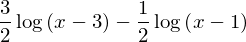

In [66]:
term = x/((x-1)*(x-3))
term.integrate(x)

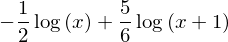

In [67]:
term = (2*x-3)/(6*x*(x+1))
term.integrate(x)

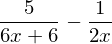

In [68]:
apart(term)

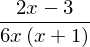

In [69]:
simplify(_)

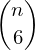

In [71]:
binomial(n, 6)

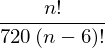

In [81]:
binomial(n, 6).rewrite(factorial)

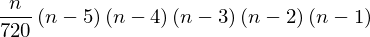

In [82]:
combsimp(_)

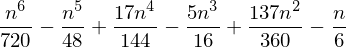

In [83]:
expand(_)

# functions and mappings

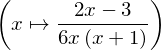

In [102]:
g = Lambda([x], (2*x-3)/(6*x*(x+1)))
g

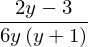

In [86]:
g(y)

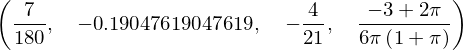

In [91]:
g(5), g(3/4), g(Integer(3)/4), g(pi)

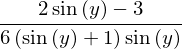

In [92]:
g(sin(y))

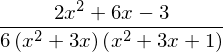

In [97]:
a = x**2 + 3*x
g(a)

In [103]:
h = Lambda([x, y], x**3 + y**2 + x*y)
h(3, pi)

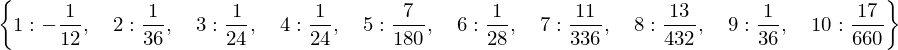

In [106]:
{i:g(i) for i in range(1, 11)}

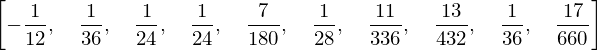

In [117]:
L = list(map(g, range(1,11)))
L

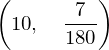

In [119]:
len(L), L[4]

In [120]:
L.append(100), len(L)

(None, 11)

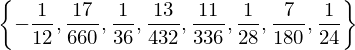

In [127]:
set(map(g, range(1,11)))

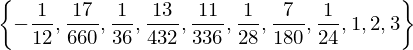

In [128]:
already_in = Integer(1)/36
_ | {already_in, 1,2,3}

# fundamental invariant

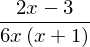

In [111]:
term = g(x)
term

In [112]:
term.func

sympy.core.mul.Mul

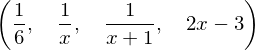

In [113]:
term.args

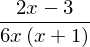

In [115]:
term.func(*term.args)

In [116]:
assert term.func(*term.args) == term

# polynomials

In [148]:
polynomial = a*x**2 + b*x + c
polynomial

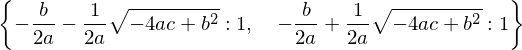

In [149]:
roots(polynomial, x)

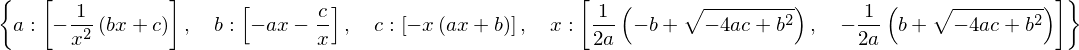

In [150]:
{s:solve(polynomial, s) for s in (a, b, c, x)}

In [151]:
eq = Eq(polynomial, 0)
eq

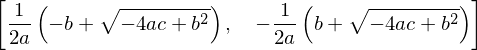

In [152]:
sols = solve(eq, x)
sols

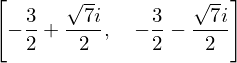

In [153]:
[sol.subs({a:1, b:3, c:4}) for sol in sols]

# sums

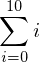

In [156]:
finite_sum = Sum(i, (i, 0, 10))
finite_sum

In [157]:
finite_sum.doit()

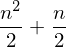

In [162]:
Sum(i, (i, 0, n)).doit()

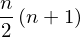

In [164]:
_.factor()

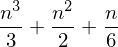

In [165]:
Sum(i**2, (i, 0, n)).doit()

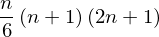

In [166]:
_.factor()

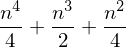

In [167]:
Sum(i**3, (i, 0, n)).doit()

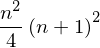

In [168]:
_.factor()

## binomials

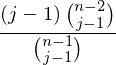

In [171]:
term = (j-1)*binomial(n-2, j-1)/binomial(n-1, j-1)
term

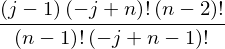

In [174]:
term.rewrite(factorial)

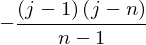

In [175]:
reduced = _.combsimp()
reduced

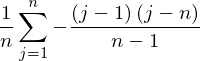

In [178]:
sum_term = Sum(reduced, (j, 1, n))/n
sum_term

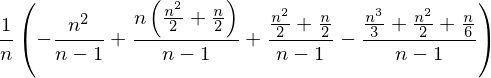

In [179]:
sum_term.doit()

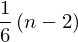

In [180]:
factor(_)

## harmonic numbers

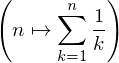

In [214]:
H = Lambda([n], Sum(1/k, (k, 1, n)))
H

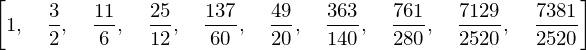

In [215]:
[H(n).doit() for n in range(1, 11)]

In [216]:
harmonic_done = H(n).doit()
harmonic_done

In [219]:
# very interesting reading....
harmonic??

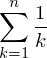

In [220]:
harmonic_done.rewrite(Sum)

In [221]:
harmonic_done.rewrite(polygamma)

In [222]:
EulerGamma, EulerGamma.evalf()

In [226]:
[(k, H(k).evalf()- log(k).evalf()) for k in range(100, 1001, 100)]

In [229]:
limit(H(k)-log(k), k, oo) is EulerGamma

True

# plotting

More here: http://nbviewer.jupyter.org/github/ipython/ipython/blob/4.0.x/examples/IPython%20Kernel/Plotting%20in%20the%20Notebook.ipynb

In [182]:
%matplotlib inline

In [259]:
import matplotlib.pyplot as plt
import numpy as np

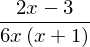

In [185]:
g(x)

In [231]:
plt.plot?

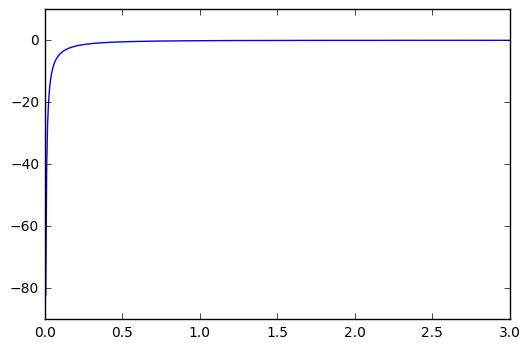

In [267]:
domain =  np.linspace(0, 3, 500)
plt.plot(domain, list(map(g, domain)))

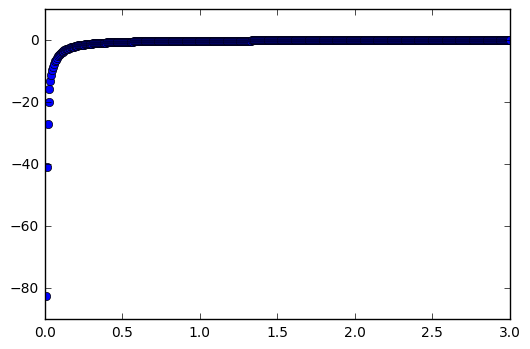

In [268]:
plt.plot(domain, list(map(g, domain)), 'bo')

In [269]:
C = Lambda([n], 2*(n+1)*(H(n+1).doit() - 1))
C

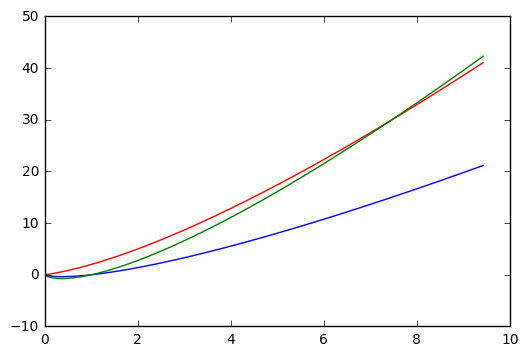

In [272]:
domain =  np.linspace(0, 3*np.pi, 500)
plt.plot(domain, list(map(C, domain)), 'r',
         domain, [j*log(j) for j in domain], 'b',
         domain, [2*j*log(j) for j in domain], 'g')

# slow recursion and memoization

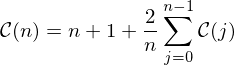

In [298]:
C_func = Function('\mathcal{C}')
Eq(C_func(n), n+1+2*Sum(C_func(j), (j, 0, n-1))/n)

In [284]:
def C_slow(n):
    return n+1+2*sum(C_slow(j) for j in range(n))/S(n) if n else 0

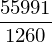

In [278]:
C_slow(10)

In [281]:
%timeit C_slow(20)

1 loop, best of 3: 6.52 s per loop


In [283]:
from functools import lru_cache

In [296]:
@lru_cache(maxsize=None)
def C_memo(n):
    return n+1+2*sum(C_memo(j) for j in range(n))/S(n) if n else 0

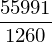

In [291]:
C_memo(10)

In [297]:
%timeit C_memo(20)

The slowest run took 7543.47 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 115 ns per loop


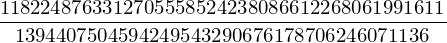

In [299]:
C_memo(100)

In [306]:
all(map(lambda d: d==0, [C(j)-C_memo(j) for j in range(100)]))

True

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.